# !!!TEST NEW GAME POV

## CONFIG AND MENU

In [26]:
# ----------------- CELL 1: CONFIG & PYGAME MENU -----------------
import pygame, sys, os, random, math, time
import numpy as np

# Basic config defaults (editable in menu)
CONFIG = {
    "SCREEN_WIDTH": 960,
    "SCREEN_HEIGHT": 640,
    "GRID_SIZE": 64,             # smaller grid for smoother/finer movement
    "PLAYER_SPEED": 6,
    "BALL_SPEED": 14,
    "EPISODES": 200,
    "ALPHA": 0.1,
    "GAMMA": 0.99,
    "EPSILON": 0.2,
    "FPS": 30,
    "HOOP_COLUMN_OFFSET": 100   # how far from right edge the hoop column starts
}

# Menu result container (filled by run_menu())
MENU = {
    "mode": None,         # "Train" or "Play"
    "algorithm": None,    # "Q-Learning", "Monte Carlo", "Actor-Critic"
    "params": {}          # filled with numeric params
}

# Helper: text input in pygame to enter numeric values
def pygame_numeric_input(screen, caption, initial="", pos=(120,300), max_chars=10):
    font = pygame.font.SysFont(None, 28)
    clock = pygame.time.Clock()
    val = initial
    active = True
    while active:
        for ev in pygame.event.get():
            if ev.type == pygame.QUIT:
                pygame.quit(); sys.exit()
            if ev.type == pygame.KEYDOWN:
                if ev.key == pygame.K_RETURN:
                    return val if val!="" else None
                elif ev.key == pygame.K_ESCAPE:
                    return None
                elif ev.key == pygame.K_BACKSPACE:
                    val = val[:-1]
                else:
                    ch = ev.unicode
                    if (ch.isdigit() or ch == ".") and len(val) < max_chars:
                        val += ch
        screen.fill((12,12,12))
        title = font.render(caption, True, (220,220,220))
        screen.blit(title, (pos[0], pos[1]-50))
        pygame.draw.rect(screen, (200,200,200), (pos[0]-6, pos[1]-6, 440, 40), 2)
        txt = font.render(val, True, (255,255,255))
        screen.blit(txt, (pos[0], pos[1]))
        hint = font.render("Enter=OK  Esc=Cancel", True, (180,180,180))
        screen.blit(hint, (pos[0], pos[1]+60))
        pygame.display.flip()
        clock.tick(30)

# Main menu UI: choose Train / Play / Quit; if Train choose algorithm and numeric params
def run_menu():
    pygame.init()
    screen = pygame.display.set_mode((640, 420))
    pygame.display.set_caption("Basketball RL - Menu")
    font = pygame.font.SysFont(None, 36)
    small = pygame.font.SysFont(None, 22)
    clock = pygame.time.Clock()

    options = ["Train", "Play", "Quit"]
    sel = 0
    while True:
        screen.fill((18,18,18))
        draw = lambda txt, pos, c: screen.blit(font.render(txt, True, c), pos)
        draw("Basketball RL - Menu", (160, 30), (255,220,120))
        for i, o in enumerate(options):
            color = (255,180,120) if i==sel else (220,220,220)
            draw(o, (260, 120 + i*60), color)
        draw("Use ↑/↓ to move, Enter to select", (180, 320), (180,180,180))
        pygame.display.flip()

        for ev in pygame.event.get():
            if ev.type == pygame.QUIT:
                pygame.quit(); sys.exit()
            if ev.type == pygame.KEYDOWN:
                if ev.key == pygame.K_UP:
                    sel = (sel - 1) % len(options)
                elif ev.key == pygame.K_DOWN:
                    sel = (sel + 1) % len(options)
                elif ev.key == pygame.K_RETURN:
                    choice = options[sel]
                    if choice == "Quit":
                        pygame.quit(); sys.exit()
                    MENU["mode"] = choice
                    break
        if MENU["mode"] is not None:
            break
        clock.tick(30)

    # If Train -> choose algorithm
    if MENU["mode"] == "Train":
        algos = ["Q-Learning", "Monte Carlo", "Actor-Critic"]
        sel = 0
        choosing = True
        while choosing:
            screen.fill((12,12,30))
            screen.blit(font.render("Choose Algorithm", True, (200,200,240)), (200,60))
            for i, a in enumerate(algos):
                color = (120,255,140) if i==sel else (200,200,200)
                screen.blit(font.render(a, True, color), (200, 150 + i*50))
            screen.blit(small.render("Use ↑/↓ Enter to select", True, (180,180,180)), (200, 320))
            pygame.display.flip()
            for ev in pygame.event.get():
                if ev.type == pygame.QUIT:
                    pygame.quit(); sys.exit()
                if ev.type == pygame.KEYDOWN:
                    if ev.key == pygame.K_UP:
                        sel = (sel - 1) % len(algos)
                    elif ev.key == pygame.K_DOWN:
                        sel = (sel + 1) % len(algos)
                    elif ev.key == pygame.K_RETURN:
                        MENU["algorithm"] = algos[sel]
                        choosing = False
            clock.tick(30)

        # Parameter editor
        params = {}
        screen.fill((10,10,10)); pygame.display.flip()
        val = pygame_numeric_input(screen, "Episodes (int):", str(CONFIG["EPISODES"]), pos=(120,220))
        params["episodes"] = int(val) if val and val.isdigit() else CONFIG["EPISODES"]

        val = pygame_numeric_input(screen, "Alpha (learning rate):", str(CONFIG["ALPHA"]), pos=(120,220))
        try: params["alpha"] = float(val) if val is not None else CONFIG["ALPHA"]
        except: params["alpha"] = CONFIG["ALPHA"]

        val = pygame_numeric_input(screen, "Gamma (discount):", str(CONFIG["GAMMA"]), pos=(120,220))
        try: params["gamma"] = float(val) if val is not None else CONFIG["GAMMA"]
        except: params["gamma"] = CONFIG["GAMMA"]

        val = pygame_numeric_input(screen, "Epsilon (exploration):", str(CONFIG["EPSILON"]), pos=(120,220))
        try: params["epsilon"] = float(val) if val is not None else CONFIG["EPSILON"]
        except: params["epsilon"] = CONFIG["EPSILON"]

        val = pygame_numeric_input(screen, "Shooter speed (int):", str(CONFIG["PLAYER_SPEED"]), pos=(120,220))
        params["shooter_speed"] = int(val) if val and val.isdigit() else CONFIG["PLAYER_SPEED"]

        val = pygame_numeric_input(screen, "Defender speed (int):", str(CONFIG["PLAYER_SPEED"]), pos=(120,220))
        params["defender_speed"] = int(val) if val and val.isdigit() else CONFIG["PLAYER_SPEED"]

        val = pygame_numeric_input(screen, "Ball speed (int):", str(CONFIG["BALL_SPEED"]), pos=(120,220))
        params["ball_speed"] = int(val) if val and val.isdigit() else CONFIG["BALL_SPEED"]

        MENU["params"] = params

    # If Play -> ask whether Defender should be manual (arrow keys) or use agent (trained)
    elif MENU["mode"] == "Play":
        screen.fill((10,10,10)); pygame.display.flip()
        choosing = True
        font_small = pygame.font.SysFont(None, 26)
        manual = False
        while choosing:
            screen.fill((14,14,14))
            screen.blit(font.render("Play Mode", True, (200,220,200)), (240, 60))
            screen.blit(font_small.render("Defender manual? (Arrow keys)  Y = Yes / N = No (use trained agent if available)", True, (200,200,200)), (50, 150))
            pygame.display.flip()
            for ev in pygame.event.get():
                if ev.type == pygame.QUIT:
                    pygame.quit(); sys.exit()
                if ev.type == pygame.KEYDOWN:
                    if ev.key == pygame.K_y:
                        manual = True; choosing = False
                    elif ev.key == pygame.K_n:
                        manual = False; choosing = False
        MENU["params"] = {
            "manual_defender": manual,
            "shooter_speed": CONFIG["PLAYER_SPEED"],
            "defender_speed": CONFIG["PLAYER_SPEED"],
            "ball_speed": CONFIG["BALL_SPEED"]
        }

    print("MENU chosen:", MENU)
    pygame.quit()
    return MENU

def draw_text(screen, text, pos, font, color=(255,255,255)):
    screen.blit(font.render(text, True, color), pos)

MENU = run_menu()


MENU chosen: {'mode': 'Train', 'algorithm': 'Actor-Critic', 'params': {'episodes': 50, 'alpha': 0.1, 'gamma': 0.99, 'epsilon': 0.2, 'shooter_speed': 50, 'defender_speed': 50, 'ball_speed': 50}}


## ENVIRONMENT

In [27]:
# ----------------- CELL 2: BasketballEnv -----------------
import pygame, os, math, random
import numpy as np

class BasketballEnv:
    def __init__(self, cfg, render_fps=None):
        self.cfg = cfg
        self.W = cfg["SCREEN_WIDTH"]
        self.H = cfg["SCREEN_HEIGHT"]
        self.grid = cfg["GRID_SIZE"]   # make smaller in CFG for smoother movement
        self.hoop_x = self.W - cfg["HOOP_COLUMN_OFFSET"]
        self.player_speed_default = cfg["PLAYER_SPEED"]
        self.ball_speed_default = cfg["BALL_SPEED"]
        self.render_fps = render_fps if render_fps else cfg["FPS"]

        # Pygame init and screen (do not call quit here)
        pygame.init()
        self.screen = pygame.display.set_mode((self.W, self.H))
        pygame.display.set_caption("Basketball RL - Game")

        # Load images if available (placeholders otherwise)
        def load_or_placeholder(path, size, label):
            if os.path.exists(path):
                try:
                    img = pygame.image.load(path).convert_alpha()
                    return pygame.transform.smoothscale(img, size)
                except:
                    pass
            surf = pygame.Surface(size, pygame.SRCALPHA)
            surf.fill((40,40,40))
            pygame.draw.rect(surf, (200,200,200), surf.get_rect(), 2)
            f = pygame.font.SysFont(None, 18)
            surf.blit(f.render(label, True, (220,220,220)), (4,4))
            return surf

        # Default placeholders
        self.court_img = load_or_placeholder("halfcourt.png", (self.W, self.H), "Court")
        self.shooter_img = load_or_placeholder("shooter.png", (44,44), "Shooter")
        self.defender_img = load_or_placeholder("defender (2).png", (44,44), "Defender")
        self.hoop_img = load_or_placeholder("ring.png", (64,24), "Hoop")
        self.ball_img = load_or_placeholder("basketball.png", (18,18), "Ball")

        # Entity rectangles (positions)
        self.episode = 0   # will be set by training loop
        self.reset()

        # --- Global cumulative stats across episodes ---
        self.global_shooter_score = 0
        self.global_defender_blocks = 0
        self.global_reward = 0

        # Font
        self.font = pygame.font.SysFont(None, 24)
        self.clock = pygame.time.Clock()

    def reset(self, shooter_pos=None, defender_pos=None, shooter_speed=None, defender_speed=None, ball_speed=None):
        self.shooter_speed = shooter_speed if shooter_speed is not None else self.player_speed_default
        self.defender_speed = defender_speed if defender_speed is not None else self.player_speed_default
        self.ball_speed = ball_speed if ball_speed is not None else self.ball_speed_default

        self.shooter = pygame.Rect(80, self.H//2 - 22, 44, 44)
        self.defender = pygame.Rect(self.W//2, self.H//2 - 22, 44, 44)
        if shooter_pos: self.shooter.topleft = shooter_pos
        if defender_pos: self.defender.topleft = defender_pos

        # Ball follows shooter until shot
        self.ball_x = self.shooter.centerx
        self.ball_y = self.shooter.centery
        self.ball_in_motion = False
        self.ball_vel_x = 0

        # Per-episode stats (reset each ep)
        self.shooter_score = 0
        self.defender_blocks = 0

        self.done = False
        self.last_reward = 0
        return self._get_state()

    def _get_state(self):
        # Discrete state representation
        sx = max(0, min(self.W - 1, self.shooter.x)) // self.grid
        sy = max(0, min(self.H - 1, self.shooter.y)) // self.grid
        dx = max(0, min(self.W - 1, self.defender.x)) // self.grid
        dy = max(0, min(self.H - 1, self.defender.y)) // self.grid
        ball = 1 if self.ball_in_motion else 0
        return (sx, sy, dx, dy, ball)

    def _constrain_positions(self):
        max_shooter_x = self.hoop_x - 60
        if self.shooter.x > max_shooter_x:
            self.shooter.x = max_shooter_x
        max_def_x = self.hoop_x - 20
        if self.defender.x > max_def_x:
            self.defender.x = max_def_x

        for r in [self.shooter, self.defender]:
            r.x = max(0, min(self.W - r.width, r.x))
            r.y = max(0, min(self.H - r.height, r.y))

    def step(self, action_defender, action_shooter=None, shoot=False):
        self.last_reward = 0
        self.done = False

        # Move shooter
        if action_shooter == "UP":
            self.shooter.y -= self.shooter_speed
        elif action_shooter == "DOWN":
            self.shooter.y += self.shooter_speed
        elif action_shooter == "LEFT":
            self.shooter.x -= self.shooter_speed
        elif action_shooter == "RIGHT":
            self.shooter.x += self.shooter_speed

        # Ball follows shooter if not in motion
        if not self.ball_in_motion:
            self.ball_x = self.shooter.centerx
            self.ball_y = self.shooter.centery

        # Move defender
        if action_defender == "UP":
            self.defender.y -= self.defender_speed
        elif action_defender == "DOWN":
            self.defender.y += self.defender_speed
        elif action_defender == "LEFT":
            self.defender.x -= self.defender_speed
        elif action_defender == "RIGHT":
            self.defender.x += self.defender_speed

        self._constrain_positions()

        # Shooting logic
        if shoot and not self.ball_in_motion:
            self.ball_in_motion = True
            self.ball_x = self.shooter.centerx
            self.ball_y = self.shooter.centery
            self.ball_vel_x = self.ball_speed

        if self.ball_in_motion:
            self.ball_x += self.ball_vel_x

            # Check block
            dist_x = abs(self.defender.centerx - self.ball_x)
            dist_y = abs(self.defender.centery - self.ball_y)
            if dist_x < 36 and dist_y < 36: 
                self.last_reward = +10
                self.defender_blocks += 1
                self.global_defender_blocks += 1
                self.global_reward += self.last_reward
                self.ball_in_motion = False
                self.done = True

            # Check score only if ball passes hoop *and* within vertical range
            elif self.ball_x >= self.hoop_x:
                hoop_y = self.H//2 - self.hoop_img.get_height()//2
                hoop_top = hoop_y
                hoop_bottom = hoop_y + self.hoop_img.get_height()
                if hoop_top <= self.ball_y <= hoop_bottom:
                    self.last_reward = -10
                    self.shooter_score += 1
                    self.global_shooter_score += 1
                    self.global_reward += self.last_reward
                else:
                    self.last_reward = 0  # miss = no reward
                self.ball_in_motion = False
                self.done = True

        return self._get_state(), self.last_reward, self.done, {
            "blocks": self.defender_blocks,
            "shooter_score": self.shooter_score
        }

    def render(self):
        self.screen.blit(self.court_img, (0,0))
        hoop_y = self.H//2 - self.hoop_img.get_height()//2
        self.screen.blit(self.hoop_img, (self.hoop_x, hoop_y))
        self.screen.blit(self.shooter_img, (self.shooter.x, self.shooter.y))
        self.screen.blit(self.defender_img, (self.defender.x, self.defender.y))

        if self.ball_in_motion:
            self.screen.blit(self.ball_img, (int(self.ball_x - self.ball_img.get_width()/2),
                                             int(self.ball_y - self.ball_img.get_height()/2)))
        else:
            self.screen.blit(self.ball_img, (self.shooter.centerx - self.ball_img.get_width()//2,
                                             self.shooter.centery - self.ball_img.get_height()//2))

        # --- SCOREBOARD TEXT (CUMULATIVE) ---
        txt = (f"Episode: {self.episode}  |  "
               f"Blocks (Total): {self.global_defender_blocks}  |  "
               f"Shooter Score (Total): {self.global_shooter_score}  |  "
               f"Reward (Total): {self.global_reward}")
        score_surf = self.font.render(txt, True, (255,255,255))
        self.screen.blit(score_surf, (16,16))

        pygame.display.flip()
        self.clock.tick(self.render_fps)


## ALGORITHMS

In [28]:
# ----------------- CELL 3: RL ALGORITHMS -----------------
import math, random
from collections import defaultdict

ACTION_LIST = ["UP","DOWN","LEFT","RIGHT","STAY","SHOOT"]
# For defender agent we will not include SHOOT action - defender's actions are movement & stay:
DEF_ACTIONS = ["UP","DOWN","LEFT","RIGHT","STAY"]

class QLearningAgent:
    def __init__(self, env, params):
        self.env = env
        self.alpha = params.get("alpha", 0.1)
        self.gamma = params.get("gamma", 0.99)
        self.epsilon = params.get("epsilon", 0.2)
        self.q = defaultdict(lambda: np.zeros(len(DEF_ACTIONS)))  # tabular

    def state_key(self, s):
        # s is the tuple from env._get_state()
        return tuple(s)

    def choose_action(self, state):
        key = self.state_key(state)
        if random.random() < self.epsilon:
            return random.choice(DEF_ACTIONS)
        vals = self.q[key]
        return DEF_ACTIONS[int(np.argmax(vals))]

    def learn_step(self, state, action, reward, next_state):
        sk = self.state_key(state)
        nk = self.state_key(next_state)
        a_idx = DEF_ACTIONS.index(action)
        best_next = np.max(self.q[nk])
        td = reward + self.gamma * best_next - self.q[sk][a_idx]
        self.q[sk][a_idx] += self.alpha * td

class MonteCarloAgent:
    def __init__(self, env, params):
        self.env = env
        self.returns = defaultdict(list)
        self.Q = defaultdict(lambda: np.zeros(len(DEF_ACTIONS)))
        self.gamma = params.get("gamma", 0.99)
        self.epsilon = params.get("epsilon", 0.2)

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.choice(DEF_ACTIONS)
        return DEF_ACTIONS[int(np.argmax(self.Q[state]))]

    def learn_episode(self, episode):  # episode = list of (s,a,r)
        G = 0
        visited = set()
        for s,a,r in reversed(episode):
            G = self.gamma * G + r
            if (s,a) not in visited:
                self.returns[(s,a)].append(G)
                self.Q[s][DEF_ACTIONS.index(a)] = np.mean(self.returns[(s,a)])
                visited.add((s,a))

class ActorCriticAgent:
    def __init__(self, env, params):
        self.env = env
        self.actor = defaultdict(lambda: np.zeros(len(DEF_ACTIONS)))  # preferences
        self.critic = defaultdict(float)
        self.alpha = params.get("alpha", 0.001)
        self.beta = params.get("beta", 0.01)
        self.gamma = params.get("gamma", 0.99)
        self.epsilon = params.get("epsilon", 0.2)

    def softmax(self, prefs):
        ex = np.exp(prefs - np.max(prefs))
        probs = ex / np.sum(ex)
        return probs

    def choose_action(self, state):
        prefs = self.actor[state]
        probs = self.softmax(prefs)
        if random.random() < self.epsilon:
            return random.choice(DEF_ACTIONS)
        return np.random.choice(DEF_ACTIONS, p=probs)

    def learn_step(self, state, action, reward, next_state):
        s = state; ns = next_state
        a_idx = DEF_ACTIONS.index(action)
        td_target = reward + self.gamma * self.critic[ns]
        td_error = td_target - self.critic[s]
        # update critic
        self.critic[s] += self.beta * td_error
        # update actor preferences
        prefs = self.actor[s]
        probs = self.softmax(prefs)
        for i in range(len(prefs)):
            if i == a_idx:
                prefs[i] += self.alpha * td_error * (1 - probs[i])
            else:
                prefs[i] -= self.alpha * td_error * probs[i]
        self.actor[s] = prefs


## TRAINING LOOP

In [29]:
# ----------------- CELL 4: TRAINING LOOP -----------------
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

def scripted_shooter_policy(env):
    """
    Simple scripted shooter for training:
    - Move up/down randomly, sometimes move toward hoop then shoot when forward enough.
    - Returns tuple (action_shooter_str, shoot_boolean)
    """
    shoot_prob = 0.08
    move = random.choice(["STAY","UP","DOWN","LEFT","RIGHT","STAY"])
    if random.random() < 0.25:
        move = "RIGHT"
    shoot = False
    if env.shooter.centerx > env.hoop_x - 220 and random.random() < shoot_prob:
        shoot = True
    return move, shoot

def train(env, agent, episodes=200, render=True):
    rewards_history = []

    # keep cumulative stats here (not reset every env.reset)
    total_shooter_score = 0
    total_defender_blocks = 0
    cumulative_reward = 0   # <-- NEW: running reward tracker

    for ep in range(1, episodes+1):
        # reset env (but do NOT wipe global counters)
        env.reset(shooter_speed=MENU["params"].get("shooter_speed"),
                  defender_speed=MENU["params"].get("defender_speed"),
                  ball_speed=MENU["params"].get("ball_speed"))

        env.episode = ep  # ensure correct episode sync
        done = False
        ep_reward = 0
        mc_episode = []

        while not done:
            s = env._get_state()
            action_def = agent.choose_action(s)

            action_shooter, shoot = scripted_shooter_policy(env)

            next_s, reward, done, info = env.step(
                action_defender=action_def,
                action_shooter=action_shooter,
                shoot=shoot
            )
            ep_reward += reward
            cumulative_reward += reward   # <-- Add to running total

            if isinstance(agent, QLearningAgent):
                agent.learn_step(s, action_def, reward, next_s)
            elif isinstance(agent, ActorCriticAgent):
                agent.learn_step(s, action_def, reward, next_s)
            elif isinstance(agent, MonteCarloAgent):
                mc_episode.append((s, action_def, reward))

            if render:
                env.render()

            for ev in pygame.event.get():
                if ev.type == pygame.QUIT:
                    pygame.quit(); sys.exit()

        if isinstance(agent, MonteCarloAgent) and mc_episode:
            agent.learn_episode(mc_episode)

        rewards_history.append(ep_reward)

        # update cumulative totals
        total_shooter_score += env.shooter_score
        total_defender_blocks += env.defender_blocks

        # --- Notebook logging output (sync with UI scoreboard) ---
        print(f"Episode {ep}/{episodes} | "
              f"Shooter Total Score: {total_shooter_score} | "
              f"Defender Total Blocks: {total_defender_blocks} | "
              f"Reward: {cumulative_reward} | "   # <-- running reward
              f"Last Reward: {env.last_reward}")  # <-- per-step reward

        if ep % 20 == 0:
            time.sleep(0.2)

    # plot rewards after training
    plt.figure()
    plt.plot(rewards_history)
    plt.title("Rewards per Episode")
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.show()

    return agent, rewards_history


## MAIN

Starting training: Actor-Critic for 50 episodes
Episode 1/50 | Shooter Total Score: 0 | Defender Total Blocks: 0 | Reward: 0 | Last Reward: 0
Episode 2/50 | Shooter Total Score: 1 | Defender Total Blocks: 0 | Reward: -10 | Last Reward: -10
Episode 3/50 | Shooter Total Score: 1 | Defender Total Blocks: 0 | Reward: -10 | Last Reward: 0
Episode 4/50 | Shooter Total Score: 1 | Defender Total Blocks: 0 | Reward: -10 | Last Reward: 0
Episode 5/50 | Shooter Total Score: 1 | Defender Total Blocks: 0 | Reward: -10 | Last Reward: 0
Episode 6/50 | Shooter Total Score: 1 | Defender Total Blocks: 0 | Reward: -10 | Last Reward: 0
Episode 7/50 | Shooter Total Score: 1 | Defender Total Blocks: 0 | Reward: -10 | Last Reward: 0
Episode 8/50 | Shooter Total Score: 1 | Defender Total Blocks: 0 | Reward: -10 | Last Reward: 0
Episode 9/50 | Shooter Total Score: 1 | Defender Total Blocks: 0 | Reward: -10 | Last Reward: 0
Episode 10/50 | Shooter Total Score: 1 | Defender Total Blocks: 0 | Reward: -10 | Last R

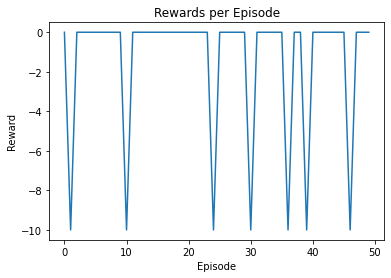

Training finished.


In [30]:
# ----------------- CELL 5: MAIN RUNNER -----------------
import pygame

# Create environment
env = BasketballEnv(CONFIG)

trained_agent = None

if MENU["mode"] == "Train":
    # instantiate the chosen agent
    params = {
        "alpha": MENU["params"].get("alpha", CONFIG["ALPHA"]),
        "gamma": MENU["params"].get("gamma", CONFIG["GAMMA"]),
        "epsilon": MENU["params"].get("epsilon", CONFIG["EPSILON"])
    }
    alg = MENU["algorithm"]
    print(f"Starting training: {alg} for {MENU['params'].get('episodes')} episodes")
    if alg == "Q-Learning":
        agent = QLearningAgent(env, {"alpha":params["alpha"], "gamma":params["gamma"], "epsilon":params["epsilon"]})
    elif alg == "Monte Carlo":
        agent = MonteCarloAgent(env, {"gamma":params["gamma"], "epsilon":params["epsilon"]})
    elif alg == "Actor-Critic":
        agent = ActorCriticAgent(env, {"alpha":params["alpha"], "gamma":params["gamma"], "epsilon":params["epsilon"], "beta":0.01})
    else:
        raise ValueError("Unknown algorithm")

    trained_agent, rewards = train(env, agent, episodes=MENU["params"].get("episodes", 100), render=True)
    print("Training finished.")

    # After training you can proceed to manual Play or stop. We'll keep trained_agent in variable.

elif MENU["mode"] == "Play":
    manual_def = MENU["params"].get("manual_defender", False)
    print("Starting Play mode. Controls: Shooter = WASD, Shoot=SPACE. Defender = Arrow keys (if manual) or Agent (if trained).")
    # If an agent was trained earlier in this session, use it; otherwise fallback to random agent
    if trained_agent is None:
        # create a simple random Q agent (no training) as fallback
        trained_agent = QLearningAgent(env, {"alpha":0.1,"gamma":0.99,"epsilon":0.0})

    running = True
    clock = pygame.time.Clock()
    while running:
        s = env._get_state()
        # handle events
        move_shooter = None
        shoot_flag = False
        move_defender = None
        for ev in pygame.event.get():
            if ev.type == pygame.QUIT:
                running = False
            if ev.type == pygame.KEYDOWN:
                if ev.key == pygame.K_SPACE:
                    shoot_flag = True

        keys = pygame.key.get_pressed()
        # Shooter (human) WASD
        if keys[pygame.K_w]: move_shooter = "UP"
        elif keys[pygame.K_s]: move_shooter = "DOWN"
        elif keys[pygame.K_a]: move_shooter = "LEFT"
        elif keys[pygame.K_d]: move_shooter = "RIGHT"
        else: move_shooter = "STAY"

        # Defender manual or agent
        if manual_def:
            if keys[pygame.K_UP]: move_defender = "UP"
            elif keys[pygame.K_DOWN]: move_defender = "DOWN"
            elif keys[pygame.K_LEFT]: move_defender = "LEFT"
            elif keys[pygame.K_RIGHT]: move_defender = "RIGHT"
            else: move_defender = "STAY"
        else:
            # agent action
            move_defender = trained_agent.choose_action(s)

        # step env
        next_s, reward, done, info = env.step(action_defender=move_defender, action_shooter=move_shooter, shoot=shoot_flag)
        env.render(episode=None)

        if done:
            # Print episode outcome to notebook output (you requested prints go only to cell output)
            print(f"Play round result -> reward: {reward} | Blocks(this round): {info.get('blocks')} | Shooter score(this round): {info.get('shooter_score')}")
            # short pause then reset
            time.sleep(0.6)
            env.reset()
        clock.tick(CONFIG["FPS"])

    pygame.quit()
else:
    raise ValueError("MENU mode not set correctly. Re-run Cell 1.")
